# Datasets and Visualizations

In [2]:
%matplotlib notebook
import numpy as np
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Dataset Download

Download Ames Residential Homesale Dataset. https://www.openintro.org/stat/data/?data=ames

In [3]:
url="https://www.openintro.org/stat/data/ames.csv"
df=pd.read_csv(url)
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Plot 2 story houses sold in 2010.

<IPython.core.display.Javascript object>


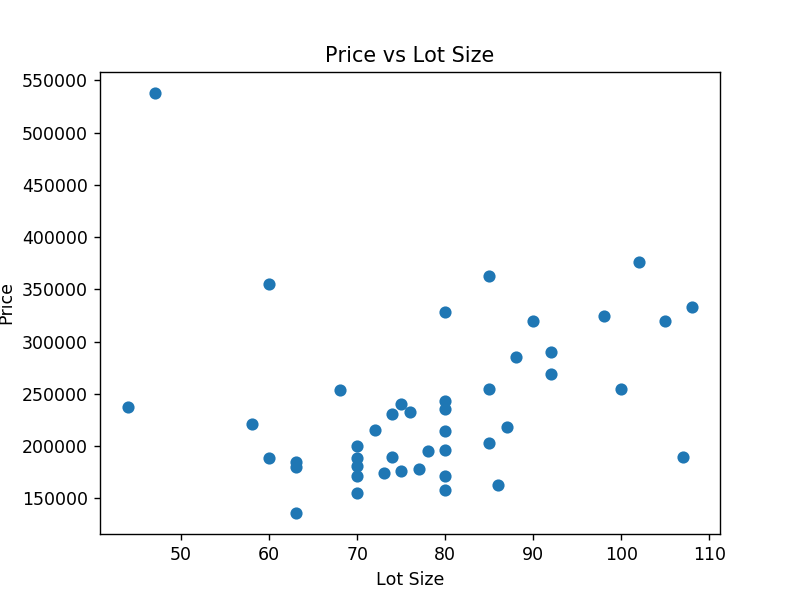

In [4]:
index_2br_2010 = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2010)
price = df['SalePrice'][index_2br_2010]
lot   = df['Lot.Frontage'][index_2br_2010]
bedroom = df['Bedroom.AbvGr'][index_2br_2010]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lot, price)
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Price vs Lot Size")
plt.show()

<IPython.core.display.Javascript object>


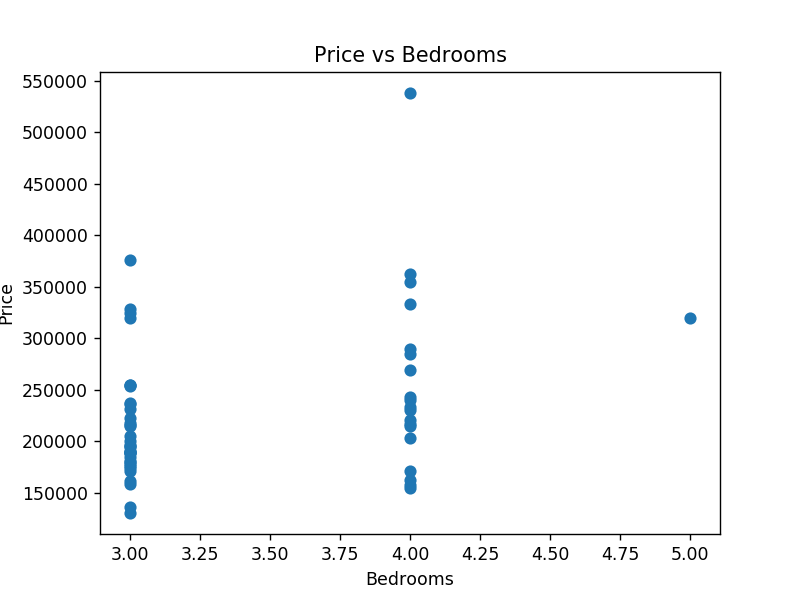

In [5]:
fig = plt.figure()
plt.scatter(bedroom, price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
plt.show()

<IPython.core.display.Javascript object>


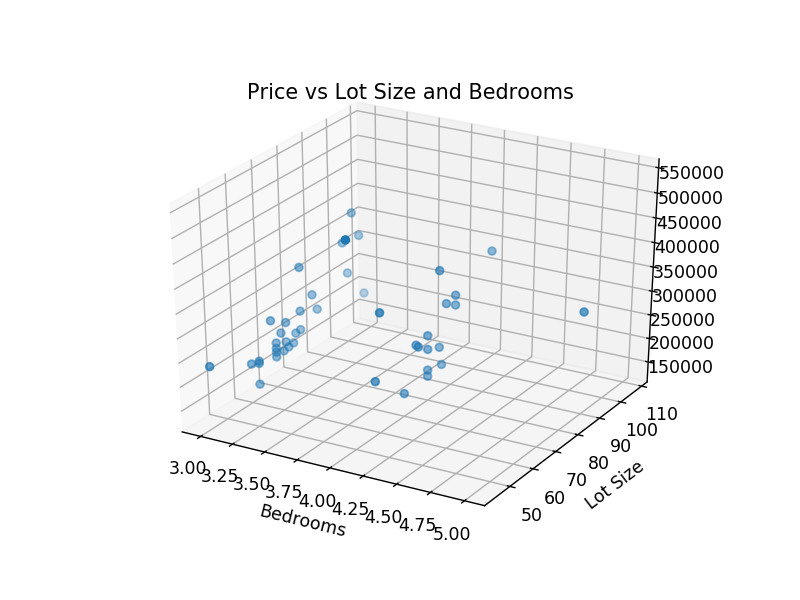

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bedroom, lot, price)
plt.title('Price vs Lot Size and Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Lot Size')
plt.show()

Miles per gallon in the city to Highway Miles per Gallon of old cars. The hypothesis is that there should be a linear relationship, because some cars are just more efficient than others. 

In [7]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df1=pd.read_csv(url, header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<IPython.core.display.Javascript object>


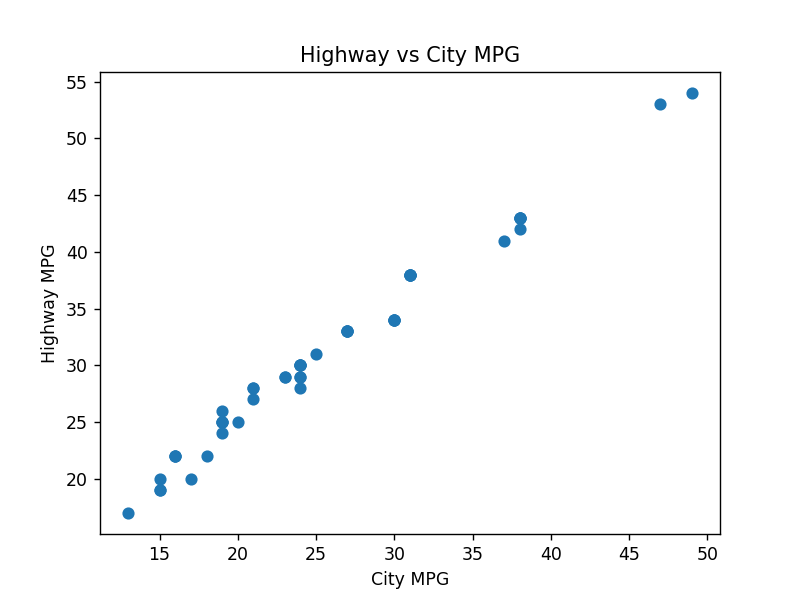

In [8]:
n = 50 # we'll take the first 50 values
d = df1.values
city_mpg, hi_mpg = 23,24
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(d[1:n,city_mpg], d[1:n,hi_mpg])
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Highway vs City MPG')
plt.show()

Now that looks like a line! If we wanted to predict the highway MPG as a function of the city MPG, we could model this relationship using linear regression.

<IPython.core.display.Javascript object>


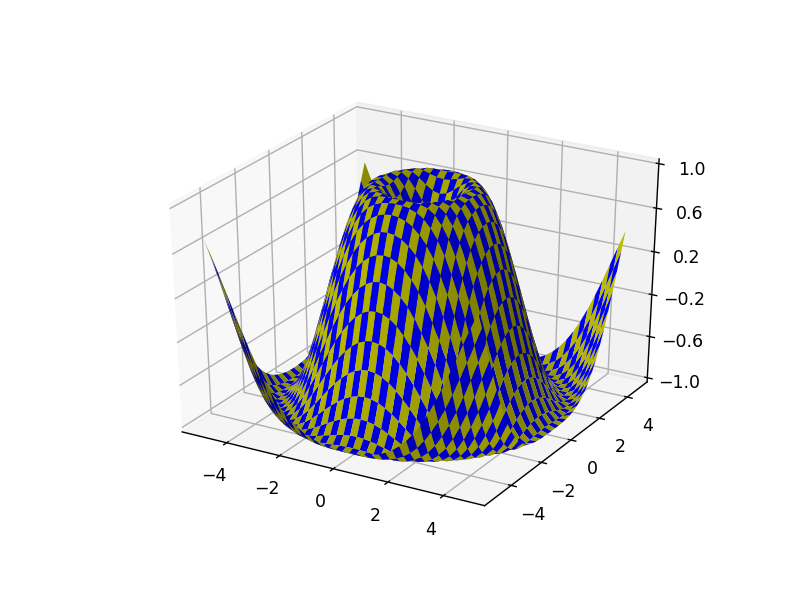

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.25  4.25  4.25 ...  4.25  4.25  4.25]
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]]


In [9]:
'''
=========================
3D surface (checkerboard)
=========================

Demonstrates plotting a 3D surface colored in a checkerboard pattern.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
print(X)
print(Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()
